# Exploratory Data Analysis

In [52]:
import pandas as pd
import numpy as np
from numpy import mean
import time
from datetime import datetime
import calendar
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

In [53]:
#Load in the data
train = pd.read_csv("../Resources/train.csv")
test = pd.read_csv("../Resources/test.csv")

In [54]:
#Inspecting the Data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

In [55]:
print ('The train data has {} rows and {} columns'.format(train.shape[0],train.shape[1]))
print ('---------------------------------------------')
print ('The test data has {} rows and {} columns'.format(test.shape[0],test.shape[1]))

The train data has 3000 rows and 23 columns
---------------------------------------------
The test data has 4398 rows and 22 columns


In [56]:
train.head(10)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970
5,6,NaN,8000000,"[{'id': 16, 'name': 'Animation'}, {'id': 12, '...",NaN,tt0093743,en,Pinocchio and the Emperor of the Night,"Pinocchio and his friends, a glow worm and a m...",0.743274,...,8/6/87,83.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Pinocchio and the Emperor of the Night,NaN,"[{'cast_id': 6, 'character': 'Pinocchio (voice...","[{'credit_id': '52fe46f49251416c9106558b', 'de...",3261638
6,7,NaN,14000000,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",http://www.thepossessionmovie.com/,tt0431021,en,The Possession,A young girl buys an antique box at a yard sal...,7.286477,...,8/30/12,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Fear The Demon That Doesn't Fear God,The Possession,NaN,"[{'cast_id': 23, 'character': 'Clyde', 'credit...","[{'credit_id': '52fe4981c3a368484e12ee29', 'de...",85446075
7,8,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,tt0391024,en,Control Room,A chronicle which provides a rare window into ...,1.949044,...,1/15/04,84.0,"[{'iso_639_1': 'ar', 'name': 'العربية'}, {'iso...",Released,Different channels. Different truths.,Control Room,"[{'id': 917, 'name': 'journalism'}, {'id': 163...","[{'cast_id': 2, 'character': 'Himself', 'credi...","[{'credit_id': '52fe47a69251416c750a0daf', 'de...",2586511
8,9,"[{'id': 256377, 'name': 'The Muppet Collection...",0,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...",NaN,tt0117110,en,Muppet Treasure Island,After telling the story of Flint's last journe...,6.902423,...,2/16/96,100.0,"[{'

In [57]:
print("Training set missing values:\n", train.isna().sum())
print("\nTest set missing values:\n", test.isna().sum())

Training set missing values:
 id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64

Test set missing values:
 id                          0
belongs_to_collection    3521
budget                      0
genres                     16
homepage                 2978
imdb_id                     0
original_language           0
original_title              0


### Three lists representing:

-1. the features used in the model.

-2. features that will be log transfrom

-3. columns dropped entirely. 

Variables will be added to each list to select relevant columns for modeling.

In [58]:
train_features = []
log_features = []
cols_to_drop = []

# Revenue
The revenue variable is the target variable we are using for our label, so we will analyze it first. This column represents the worldwide box office revenue of the film.

(Univariate Analysis)

In [59]:
print('Movies missing revenue:',train.revenue.isna().sum())

Movies missing revenue: 0


`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


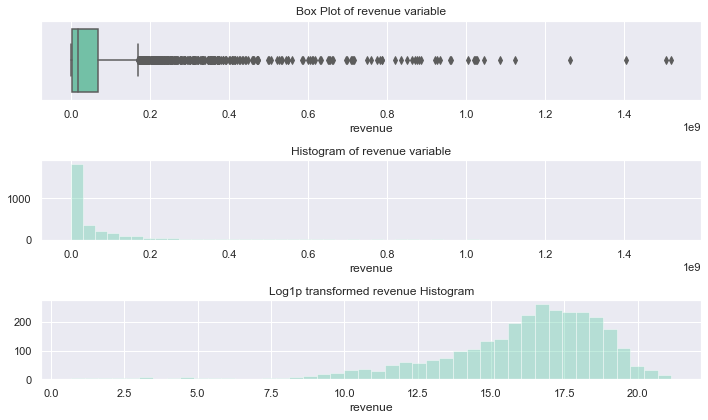

In [119]:
f, ax = plt.subplots(3, figsize=(10,6))

sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(x=train.revenue, ax = ax[0], color='mediumaquamarine')
ax[0].set_title("Box Plot of revenue variable")
sns.distplot(a=train.revenue, kde = False, ax = ax[1], color='mediumaquamarine')
ax[1].set_title("Histogram of revenue variable")
sns.distplot(a=np.log1p(train.revenue), kde = False, ax = ax[2], color='mediumaquamarine')
ax[2].set_title("Log1p transformed revenue Histogram")
f.tight_layout()

In [120]:
train.revenue.nsmallest(20)

347      1
1754     1
1874     1
1917     1
695      2
334      3
1541     3
2383     3
2117     4
1346     5
2490     6
1190     7
639      8
2251     8
2582     8
280     10
665     10
1141    11
312     12
450     12
Name: revenue, dtype: int64

In [118]:
#adding to log_features list.
log_features.append("revenue")

When looking at the target variable we can see the revenue distribution is heavily skewed to the right. This makes sense beacause the average movie is making nearly $67 million, but there are so many movies that make hundreds of millions every year, ebbing the most major hits in the box office. All of these major releases heavily skew the revenue data, so the distribution is much more managable after a log transform.

# Belongs to Collection Column
This column represents whether the film belongs to a collection, meaning it is a part of a series or collection of movies rather than a standalone. The movies that belong to a collection have the collection listed as a string in the column, whereas if there is no collection then it is left as NA. We will modify the column to be a 1 if the movie is in a collection and 0 if it is not so it is easier to work with.

In [62]:
train.belongs_to_collection = train.belongs_to_collection.apply(lambda x: 1 if type(x) == str else 0)
test.belongs_to_collection = test.belongs_to_collection.apply(lambda x: 1 if type(x) == str else 0)

In [63]:
print(train.belongs_to_collection.value_counts())

0    2396
1     604
Name: belongs_to_collection, dtype: int64


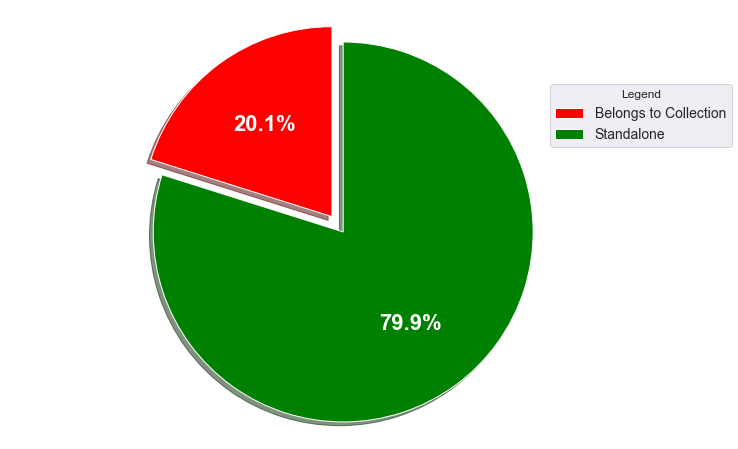

In [64]:
# plotting belongs to collection data
labels = 'Belongs to Collection', 'Standalone'
btc_1 = [sum(train.belongs_to_collection), (train.belongs_to_collection == 0).sum(axis=0)]
explode = (0.1, 0)

colors = ['red', 'green']

# plot
fig, ax = plt.subplots()
ax.pie(btc_1, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90, colors=colors, textprops={'color':"w", 'fontsize': 22, 'weight':"bold"})
ax.axis('equal') # ensures chart is a circle

ax.legend(labels,
          title="Legend",
          loc="center left",
          fontsize=14,
          bbox_to_anchor=(0.8, 0.25, 0.5, 1))

In [65]:
train.isna().sum()

id                          0
belongs_to_collection       0
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
log_revenue                 0
dtype: int64

Standalone               2396
Belongs in Collection     604
Name: has_collection, dtype: int64


Text(0.5, 0, 'Collection Status')

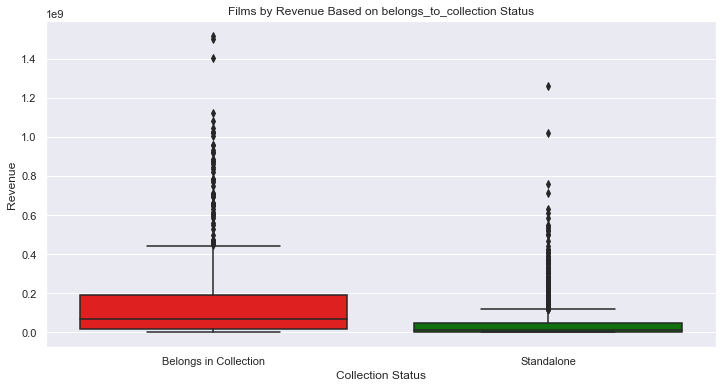

In [66]:
# bivariate analysis of revenue with belongs_to_collection
train['has_collection'] = train['belongs_to_collection'].apply(lambda x: 'Belongs in Collection' if x == 1 else 'Standalone')
print(train['has_collection'].value_counts())

pal1 = ['red', 'green']

sns.set(rc={'figure.figsize':(12, 6)})
sns.boxplot(x='has_collection', y='revenue', data=train, palette=pal1)
plt.title('Films by Revenue Based on belongs_to_collection Status')
plt.ylabel("Revenue")
plt.xlabel("Collection Status")

In [67]:
#analysis of correlation and create log feature
corr, _ = pearsonr(train['belongs_to_collection'], train['revenue'])
print('Pearsons correlation between belongs_to_collection and revenue: %.3f' % corr)
corr, _ = pearsonr(np.log1p(train['belongs_to_collection']), np.log1p(train['revenue']))
print('Pearsons correlation between belongs_to_collection and revenue: %.3f' % corr)

Pearsons correlation between belongs_to_collection and revenue: 0.339
Pearsons correlation between belongs_to_collection and revenue: 0.257


**The Pearson correlation:** Measures the strength of the linear relationship between two variables.

**numpy.log1p:** Return the natural logarithm of one plus the input array, element-wise.

In [117]:
#adding to train_features list.
train_features.append('belongs_to_collection')

# Budget
This column represents the budget of the film, meaning an estimate of income and expenditure determined for the movie. Intuitively, this seems like it could be an important variable for predicting revenue, because a higher budget and higher production movies will likely see greater success, but this is certainly not always the case and worth further exploration.

(Univariate Analysis)

In [68]:
print('Movies missing a budget:',train.budget.isna().sum())

Movies missing a budget: 0


`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


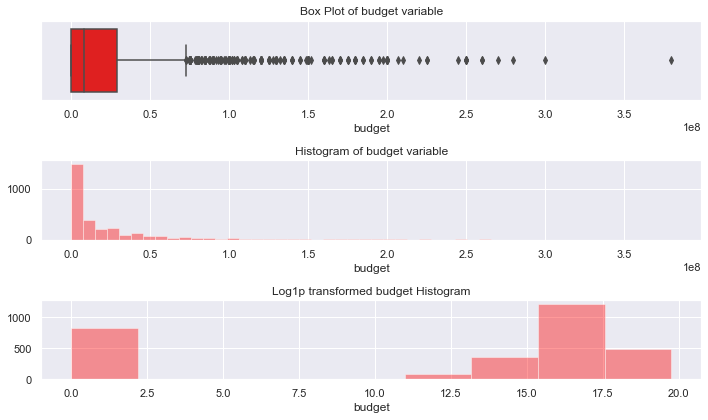

In [70]:
#plotting the data
f, ax = plt.subplots(3, figsize=(10,6))

sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(x=train.budget, ax = ax[0], color='red')
ax[0].set_title("Box Plot of budget variable")
sns.distplot(a=train.budget, kde = False, ax = ax[1], color='red')
ax[1].set_title("Histogram of budget variable")
sns.distplot(a=np.log1p(train.budget), kde = False, ax = ax[2], color='red')
ax[2].set_title("Log1p transformed budget Histogram")
f.tight_layout()

In [72]:
print('Movies with budget listed as 0: ',(train.budget == 0).sum())

Movies with budget listed as 0:  812


The distribution on budget in the training set is incomplete, a log1p transform was perdormed to make the distribution more even. While there are no movies with missing budgets or Null values, there are over 800 movies in our training set that have a budget of 0. This is highly unlikely, it is more likely that the films whithout budgets were not found and replaced with 0. For the sake of our model, 0 were replace with median budgets to reduce the skew.

In [73]:
median = train.loc[train['budget']> 0, 'budget'].median()
train["budget_processed"] = train["budget"].mask(train["budget"] == 0, median)
test["budget_processed"] = train["budget"].mask(train["budget"] == 0, median)

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


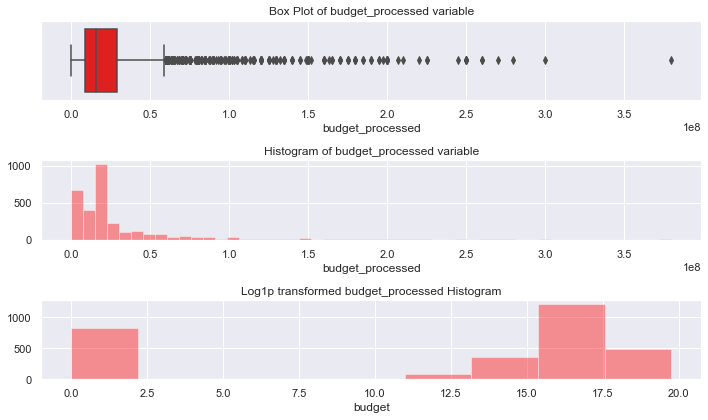

In [74]:
#plotting the data
f, ax = plt.subplots(3, figsize=(10,6))

sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(x=train.budget_processed, ax = ax[0], color='red')
ax[0].set_title("Box Plot of budget_processed variable")
sns.distplot(a=train.budget_processed, kde = False, ax = ax[1], color='red')
ax[1].set_title("Histogram of budget_processed variable")
sns.distplot(a=np.log1p(train.budget), kde = False, ax = ax[2], color='red')
ax[2].set_title("Log1p transformed budget_processed Histogram")
f.tight_layout()

# Bivariate Analysis

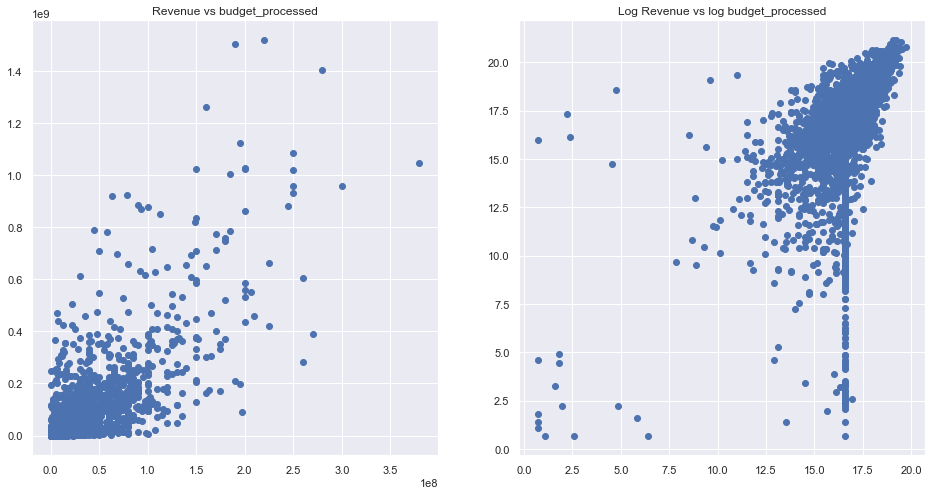

In [75]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.scatter(train['budget_processed'], train['revenue'])
plt.title('Revenue vs budget_processed');
plt.subplot(1, 2, 2)
plt.scatter(np.log1p(train['budget_processed']), np.log1p(train['revenue']))
plt.title('Log Revenue vs log budget_processed');

In [76]:
#analysis of correlation and create log feature probably
corr, _ = pearsonr(train['budget_processed'], train['revenue'])
print('Pearsons correlation between budget_processed and revenue: %.3f' % corr)
corr, _ = pearsonr(np.log1p(train['budget_processed']), np.log1p(train['revenue']))
print('Pearsons correlation between log budget_processed and log revenue: %.3f' % corr)

Pearsons correlation between budget_processed and revenue: 0.747
Pearsons correlation between log budget_processed and log revenue: 0.455


# Genres
(Pre-processing)

In [79]:
train['genres'] = train['genres'].fillna('')
train['genres_reform'] = train['genres'].apply(lambda x:re.findall("'name': \'(.+?)\'", x))

test['genres'] = test['genres'].fillna('')
test['genres_reform'] = test['genres'].apply(lambda x:re.findall("'name': \'(.+?)\'", x))

In [80]:
df = train.copy(deep=True)

In [81]:
def unpackCol(list, df):
    for i in range(len(df)):
        for name in list[i]:
            if name not in df.columns:
                df[name] = 0
            df[name][i] = 1
    return df

In [82]:
# example of using it to unpack the genres 
df = unpackCol(df['genres_reform'], df)

# here's what it did
print(df.columns)
print()
print(df['Drama'])
print()
print('Total number of Dramas: ', sum(df['Drama']))

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue',
       'log_revenue', 'has_collection', 'budget_processed', 'genres_reform',
       'Comedy', 'Drama', 'Family', 'Romance', 'Thriller', 'Action',
       'Animation', 'Adventure', 'Horror', 'Documentary', 'Music', 'Crime',
       'Science Fiction', 'Mystery', 'Foreign', 'Fantasy', 'War', 'Western',
       'History', 'TV Movie'],
      dtype='object')

0       0
1       1
2       1
3       1
4       0
       ..
2995    0
2996    1
2997    0
2998    0
2999    0
Name: Drama, Length: 3000, dtype: int64

Total number of Dramas:  1531


In [83]:
# new feature for a count of the number of genres
train['num_genres'] = train.genres_reform.apply(lambda x: len(x))
test['num_genres'] = test.genres_reform.apply(lambda x: len(x))

train['num_genres'].value_counts()

2    972
3    900
1    593
4    393
5    111
6     21
0      7
7      3
Name: num_genres, dtype: int64

## Univariate Analysis

Text(0.5, 0, 'Genre')

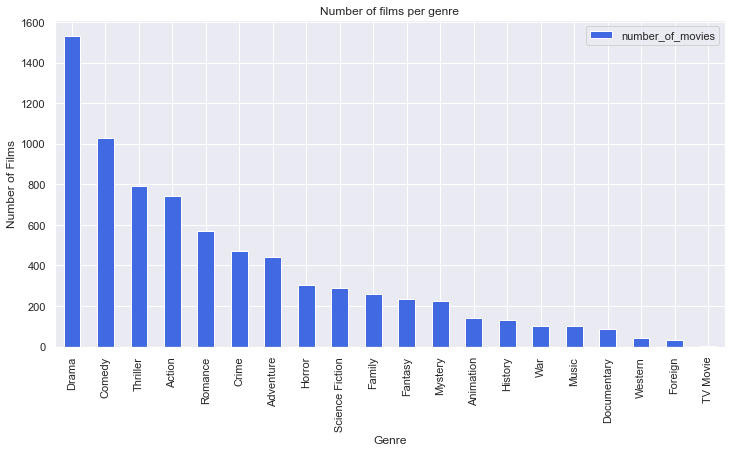

In [84]:
# plotting genres in order of number of instances in the df.csv dataset
genresDict = dict()

for genre in df["genres_reform"]:
    for elem in genre:
        if elem not in genresDict:
            genresDict[elem] = 1
        else:
            genresDict[elem] += 1


sns.set(rc={'figure.figsize':(12,6)})
genres_df = pd.DataFrame.from_dict(genresDict, orient='index')
genres_df.columns = ["number_of_movies"]
genres_df = genres_df.sort_values(by="number_of_movies", ascending=False)
genres_df.plot.bar(color='royalblue')
plt.title("Number of films per genre")
plt.ylabel("Number of Films")
plt.xlabel("Genre")

Genres of movies follow certain trends in popularity; such as the latest boom of superhero movies originating in the 1990s with 20th Century Fox's X-Men series. Although superhero films have been around since at least 1978 with Richard Donner's Superman, the recent trend has helped define the film industry over the past two decades. For the purposes of this report, Action/Adventure films (and Fantasy) encompass superhero films, but also many other types of popular films subgenres.

Action and Adventure do relatively well in terms of number of films, so it could be hypothesized that more common genres are more popular, meaning that Drama, Comedy, and Thriller movies should see the highest respective revenues. Regardless, the importance of genre for determining the revenue of a film (and likewise predicting future success) will be highly useful given the sometimes nebulous patterns of viewership.

In [85]:
# list of film genres by order of number of films in set
print(df['Drama'].sum())
print(df['Comedy'].sum())
print(df['Thriller'].sum())
print(df['Action'].sum())
print(df['Romance'].sum())
print(df['Crime'].sum())
print(df['Adventure'].sum())
print(df['Horror'].sum())
print(df['Science Fiction'].sum())
print(df['Family'].sum())
print(df['Fantasy'].sum())
print(df['Mystery'].sum())
print(df['Animation'].sum())
print(df['History'].sum())
print(df['War'].sum())
print(df['Music'].sum())
print(df['Documentary'].sum())
print(df['Western'].sum())
print(df['Foreign'].sum())
print(df['TV Movie'].sum())

1531
1028
789
741
571
469
439
301
290
260
232
225
141
132
100
100
87
43
31
1


In the case of genres, we see a near logarithmic function from Drama (1531 films) to TV Movies (1). It is assumed that this dataset is representative of broader filmography trends for the purposes of constructing hypotheses about the data. The more popular genres should typically see a likewise correlation in revenue given the increased popularity. However, it is worth considering the unique attraction of 'rare genre' films. Musicals like La La Land grossed S446.1 million for its Box Office total and did so with only a $30 million budget. Therefore, the possibility for outliers or even inverse hypotheses are worth considering.

## Bivariate Analysis

In [86]:
# bivariate analysis of revenue with genre
# creating a callable index for genres
genres_df.index.values
for g in genres_df.index.values:
    df[g] = df['genres_reform'].apply(lambda x: 1 if g in x else 0)

# median revenue per genre type
for i, g in enumerate(genres_df.index.values):
    genres_df.loc[g, "median_rev"] = df[df[g]==1].revenue.median()
    
genres_df.sort_values(by=["number_of_movies", "median_rev"], ascending=False).head(10)

# mean revenue for genre type
for i, g in enumerate(genres_df.index.values):
    genres_df.loc[g, "mean_rev"] = df[df[g]==1].revenue.mean()

genres_df.sort_values(by=["number_of_movies", "mean_rev"], ascending=False).head(10)

,number_of_movies,median_rev,mean_rev
Drama,1531,11293663.0,4.540607e+07
Comedy,1028,18809184.0,6.087574e+07
Thriller,789,21890845.0,6.833664e+07
Action,741,36000000.0,1.110434e+08
Romance,571,14016568.0,5.270501e+07
Crime,469,24048000.0,5.949128e+07
Adventure,439,59700000.0,1.758095e+08
Horror,301,17037887.0,5.270907e+07
Science Fiction,290,35109301.5,1.223672e+08
Family,260,57470029.5,1.388978e+08


Text(0.5, 0, 'Genre')

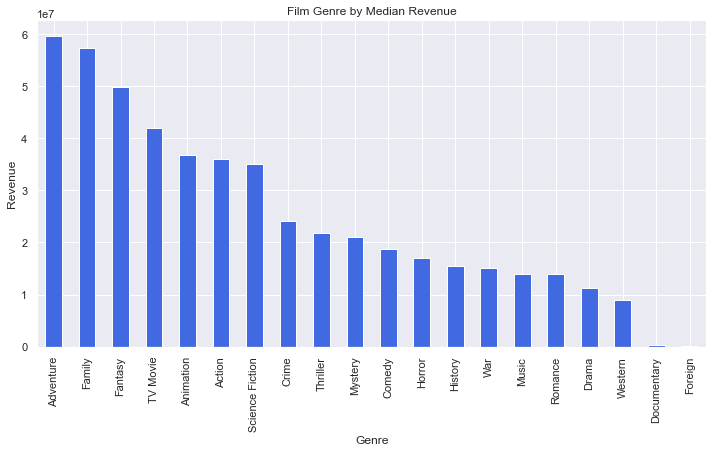

In [87]:
#genres by median revenue
genres_df.sort_values(by=["median_rev"], ascending=False).median_rev.plot.bar(color='royalblue')
plt.title("Film Genre by Median Revenue")
plt.ylabel("Revenue")
plt.xlabel("Genre")

Text(0.5, 0, 'Genre')

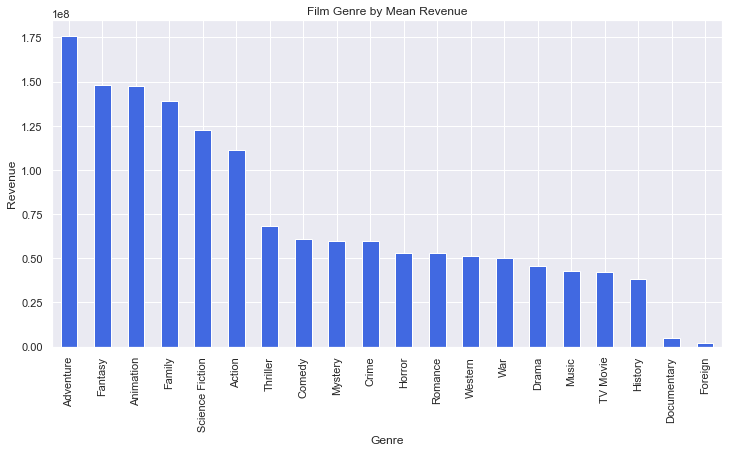

In [88]:
# genres by mean revenue
genres_df.sort_values(by=["mean_rev"], ascending=False).mean_rev.plot.bar(color='royalblue')
plt.title("Film Genre by Mean Revenue")
plt.ylabel("Revenue")
plt.xlabel("Genre")

In both 'Film Genre by Median Revenue' and 'Film Genre by Mean Revenue' Adventure films have the highest revenue values, with fairly consistent ordering down save a few notable changes. For example, using 'median_rev' the TV Movie genre scores fourth highest revenue, while using 'mean_rev' lowers the genre to fourth lowest revenue. History loses five places from 'median_rev' to 'mean_rev' and Comedy goes up three.

Although some common film genres (those with higher numbers of films in the training data) do well with regards to revenue, the overall hypothesis that commonality of a film would correlate positively to revenue is disproven with the relatively lower revenues for Dramas, Comedies, and Thrillers (the top three most numerous film genres). This could be a result of saturated genre demand, or it could be unrelated. What is certain is that Adventure, Family, Fantasy, and Animation score well with regards to median and mean revenue.

<AxesSubplot:>

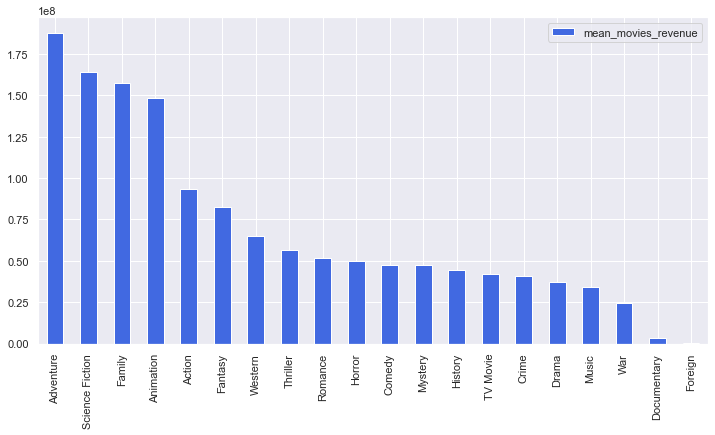

In [89]:
topGenreDict = {}
for element in train[["revenue", "genres_reform"]].values:
   # compare results when looking at top genre
    temp = 1
    if len(element[1]) < temp:
        temp = len(element[1])
    for i in range(temp):
        if element[1][i] not in topGenreDict:
            topGenreDict[element[1][i]] = [element[0], 1]
        else:
            topGenreDict[element[1][i]][0] += element[0]
            topGenreDict[element[1][i]][1] += 1    

for genre in topGenreDict:
    topGenreDict[genre][0] = topGenreDict[genre][0]/topGenreDict[genre][1]
    topGenreDict[genre] = topGenreDict[genre][0]


    
    
genres_df = pd.DataFrame.from_dict(topGenreDict, orient='index', columns=["mean_movies_revenue"])
genres_df.sort_values(by="mean_movies_revenue", ascending=False).head(25).plot.bar(color='royalblue')

In [90]:
# Sort both of our dicts of studios and top studios to more easily access the 'most successful studios'
topGenreDict = {k: v for k, v in sorted(topGenreDict.items(), key=lambda item: item[1], reverse = False)}
genresDict = {k: v for k, v in sorted(genresDict.items(), key=lambda item: item[1], reverse = True)}
print(topGenreDict)
print(genresDict)

{'Foreign': 140650.0, 'Documentary': 3538249.971830986, 'War': 24388514.85, 'Music': 33890384.55, 'Drama': 37298750.1133758, 'Crime': 40820052.02040816, 'TV Movie': 42000000.0, 'History': 44237822.875, 'Mystery': 47674838.90909091, 'Comedy': 47754836.36092715, 'Horror': 49586852.62352941, 'Romance': 51648567.82089552, 'Thriller': 56574423.54310345, 'Western': 64905713.538461536, 'Fantasy': 82345105.41176471, 'Action': 93596599.80576923, 'Animation': 148089684.90789473, 'Family': 157347482.6111111, 'Science Fiction': 163833801.36585367, 'Adventure': 187715537.32085562}
{'Drama': 1531, 'Comedy': 1028, 'Thriller': 789, 'Action': 741, 'Romance': 571, 'Crime': 469, 'Adventure': 439, 'Horror': 301, 'Science Fiction': 290, 'Family': 260, 'Fantasy': 232, 'Mystery': 225, 'Animation': 141, 'History': 132, 'Music': 100, 'War': 100, 'Documentary': 87, 'Western': 43, 'Foreign': 31, 'TV Movie': 1}


In [91]:
train['genre_rank'] = train['genres_reform'].apply(lambda x: list(topGenreDict.keys()).index(x[0]) if len(x) > 0 else 0)
test['genre_rank'] = test['genres_reform'].apply(lambda x: list(topGenreDict.keys()).index(x[0]) if len(x) > 0 else 0)

train['genre_rank'].value_counts()

4     785
9     604
15    520
19    187
10    170
5     147
12    116
16     76
1      71
14     68
11     67
18     41
17     36
8      33
2      20
3      20
7      16
13     13
0       9
6       1
Name: genre_rank, dtype: int64

In [92]:
#analysis of correlation and create log feature
corr, _ = pearsonr(train['genre_rank'], train['revenue'])
print('Pearsons correlation between genre_rank and revenue: %.3f' % corr)
corr, _ = pearsonr(np.log1p(train['genre_rank']), np.log1p(train['revenue']))
print('Pearsons correlation between genre_rank and revenue: %.3f' % corr)

Pearsons correlation between genre_rank and revenue: 0.283
Pearsons correlation between genre_rank and revenue: 0.266


In [93]:
#analysis of correlation and create log feature
corr, _ = pearsonr(train['num_genres'], train['revenue'])
print('Pearsons correlation between num_genres and revenue: %.3f' % corr)
corr, _ = pearsonr(np.log1p(train['num_genres']), np.log1p(train['revenue']))
print('Pearsons correlation between num_genres and revenue: %.3f' % corr)

Pearsons correlation between num_genres and revenue: 0.164
Pearsons correlation between num_genres and revenue: 0.191


# Homepage
(Univariate Analysis)

In [94]:
#homepage
print('Movies missing a homepage:',train.homepage.isna().sum())

Movies missing a homepage: 2054


Since the homepage itself is very unique and specific to each particular film, it not of much use to us and we will not be analyzing the content of the homepage for this project. Instead, we will create a new column representing whether a move has a homepage or not.

In [95]:
#Creating new column
train['has_homepage'] = train.homepage.apply(lambda x: 0 if pd.isnull(x) else 1)
test['has_homepage'] = test.homepage.apply(lambda x: 0 if pd.isnull(x) else 1)
train['has_homepage'].value_counts()

0    2054
1     946
Name: has_homepage, dtype: int64

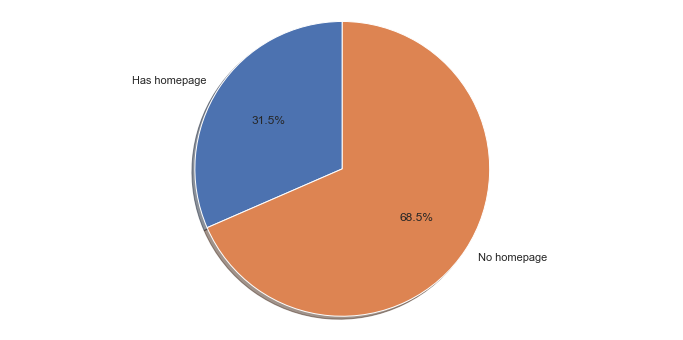

In [96]:
# plotting 'has a homepage' data
labels = 'Has homepage', 'No homepage'
btc_1 = [sum(train.has_homepage), (train.has_homepage == 0).sum(axis=0)]


fig, ax = plt.subplots()
ax.pie(btc_1, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax.axis('equal')

plt.show()

## Bivariate Analysis

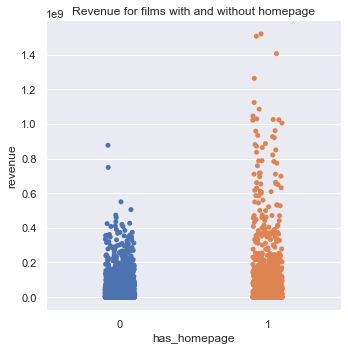

In [97]:
sns.catplot(x='has_homepage', y='revenue', data=train);
plt.title('Revenue for films with and without homepage');

In [98]:
#analysis of correlation and create log feature probably
corr, _ = pearsonr(train['has_homepage'], train['revenue'])
print('Pearsons correlation between has_homepage and revenue: %.3f' % corr)

Pearsons correlation between has_homepage and revenue: 0.263


Although it is not very strong, we do still observe a positive correlation between the existence of a homepage for a film and the revenue

# IMDb ID
Dropping IMDb ID!

# Original Language
(Univariate Analysis)

In [99]:
print("Counts of each original language:")
print(train['original_language'].value_counts()[:10])

Counts of each original language:
en    2575
fr      78
ru      47
es      43
hi      42
ja      37
it      24
cn      20
ko      20
zh      19
Name: original_language, dtype: int64


Text(0.5, 1.0, 'Revenue for a movie and its and original_language')

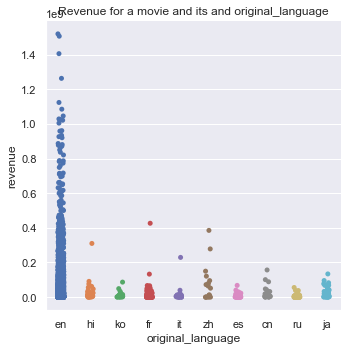

In [100]:
sns.catplot(x='original_language', y='revenue', data=train.loc[train['original_language'].isin(train['original_language'].value_counts().head(10).index)])
plt.title('Revenue for a movie and its and original_language')

Since 2575 of the 3000 movies in the training were originally released in English, and all other languages making up only a small portion of the movies, we will create a new dummy variable, simply specifying if the movie was released in english or not. It seems that it is not important what the specific other language is, but rather just that the movie is not english is most significant for our model. Additionally, the films that are in english reach mich higher revenues, so this may be a good feature to include.

In [101]:
#Creating new feature
train['in_english'] = train.original_language.apply(lambda x: 1 if x == 'en' else 0)
test['in_english'] = test.original_language.apply(lambda x: 1 if x == 'en' else 0)
train['in_english'].value_counts()

1    2575
0     425
Name: in_english, dtype: int64

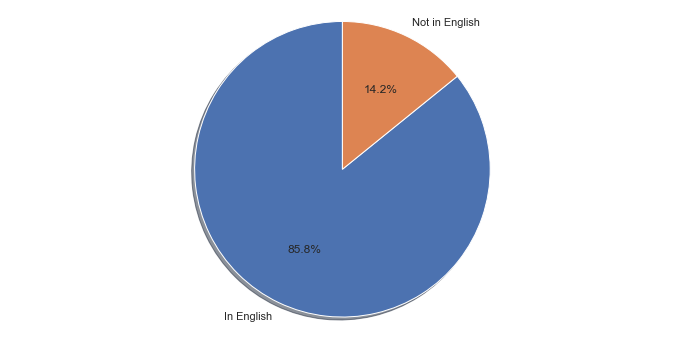

In [102]:
# plotting original data
labels = 'In English', 'Not in English'
btc_1 = [sum(train.in_english), (train.in_english == 0).sum(axis=0)]


fig, ax = plt.subplots()
ax.pie(btc_1, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax.axis('equal') # ensures chart is a circle

plt.show()

## Bivariate Analysis 

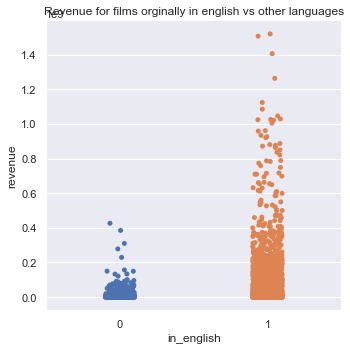

In [103]:
sns.catplot(x='in_english', y='revenue', data=train);
plt.title('Revenue for films orginally in english vs other languages');

In [104]:
#analysis of correlation and create log feature probably
corr, _ = pearsonr(train['in_english'], train['revenue'])
print('Pearsons correlation between in_english and revenue: %.3f' % corr)

Pearsons correlation between in_english and revenue: 0.142


We can see there is a weak positive correlation between the films being in english and the revenue of the film. While the films in english reach miuch greater revenues overall, this may just be simply because there are a far greater number of films released in english.

# Original Title
Dropping?

# Overview
(Univariate Analysis)

In [105]:
#overview
print('Movies missing an overview:',train.overview.isna().sum())

Movies missing an overview: 8


In [106]:
train.overview = train.overview.fillna("")
train['overview_len'] = train.overview.apply(len)
test.overview = test.overview.fillna("")
test['overview_len'] = test.overview.apply(len)

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


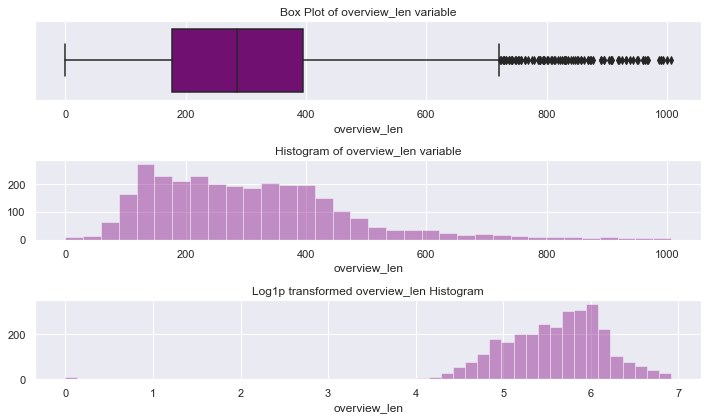

In [107]:
f, ax = plt.subplots(3, figsize=(10,6))

sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(x=train.overview_len, ax = ax[0], color='purple')
ax[0].set_title("Box Plot of overview_len variable")
sns.distplot(a=train.overview_len, kde = False, ax = ax[1], color='purple')
ax[1].set_title("Histogram of overview_len variable")
sns.distplot(a=np.log1p(train.overview_len), kde = False, ax = ax[2], color='purple')
ax[2].set_title("Log1p transformed overview_len Histogram")
f.tight_layout()

## Bivariate Analysis

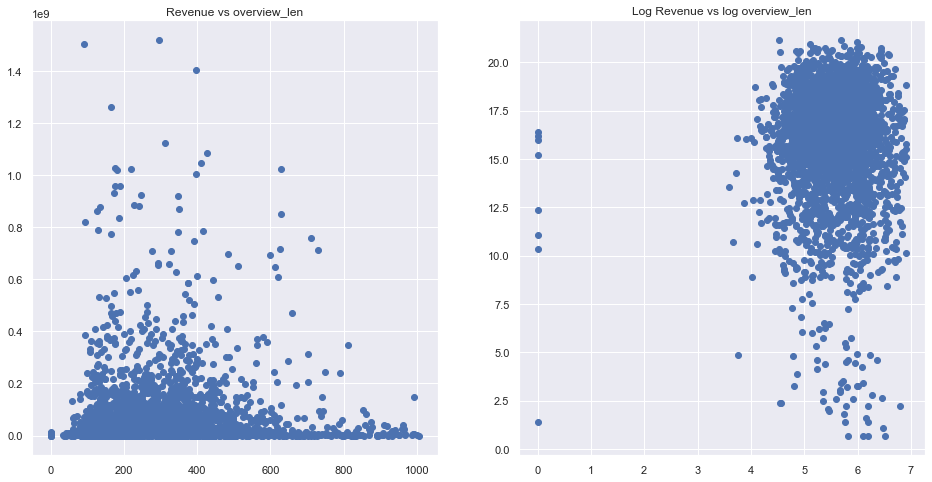

In [108]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.scatter(train['overview_len'], train['revenue'])
plt.title('Revenue vs overview_len');
plt.subplot(1, 2, 2)
plt.scatter(np.log1p(train['overview_len']), np.log1p(train['revenue']))
plt.title('Log Revenue vs log overview_len');

In [109]:
# calculate Pearson's correlation
corr, _ = pearsonr(train['overview_len'], train['revenue'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.005


# Popularity

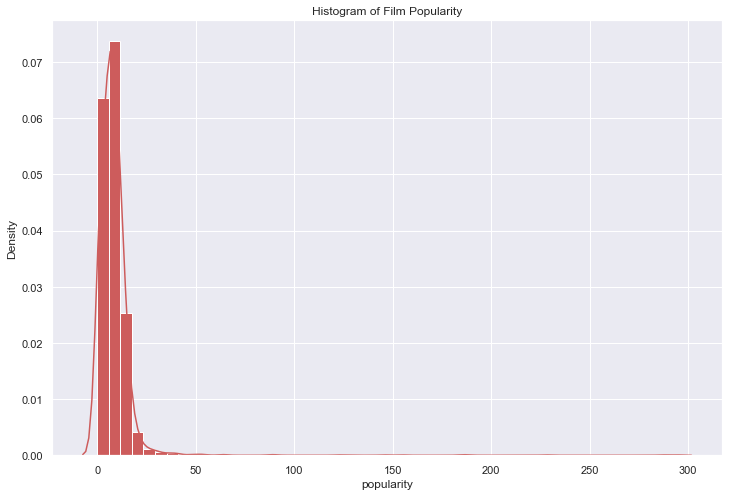

In [110]:
# plotting popularity
sns.distplot(train['popularity'], kde=True, color='indianred', hist_kws=dict(alpha=1))
sns.set(rc={'figure.figsize':(12, 2)})
plt.title('Histogram of Film Popularity')
plt.show();

In [111]:
print(train['popularity'].describe())

count    3000.000000
mean        8.463274
std        12.104000
min         0.000001
25%         4.018053
50%         7.374861
75%        10.890983
max       294.337037
Name: popularity, dtype: float64


Popularity is likely to be a significant feature in prediting revenue outcome given the importance of popularity for movie viewership (this is of course contingent upon popularity refering to the 'hype' surrounding a film and not the post-release ratings - if the later than popularity should more directly map to revenue in theory). Because of the more popularity is a good thing for marketing, and thus increased ticket sales, it is hypothesized that popularity and revenue will have a positive correlation.

Above it is seen that of the 3000 films in the dataset the average popularity was an 8.46 with a minimum of 0.00 and a max of 294.34. The histogram reveals that the bulk of the films fall between a popularity score of 0 and 25, with sparse highly popular outliers. Dealing with these outliers will be addressed later.

## Bivariate Analysis

Pearsons correlation between popularity and revenue: 0.461
Pearsons correlation between popularity and revenue: 0.542


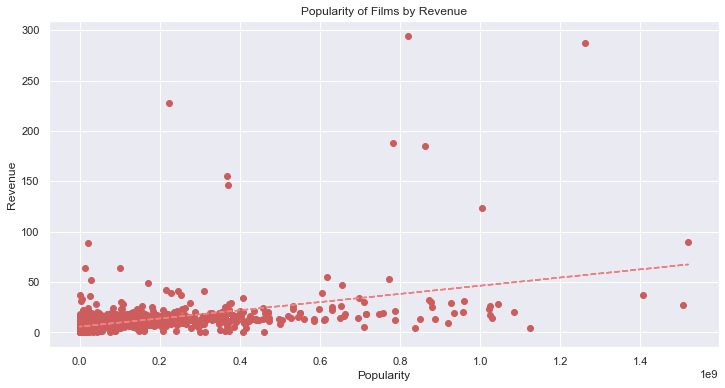

In [112]:
#analysis of correlation and create log feature
corr, _ = pearsonr(train['popularity'], train['revenue'])
print('Pearsons correlation between popularity and revenue: %.3f' % corr)
corr, _ = pearsonr(np.log1p(train['popularity']), np.log1p(train['revenue']))
print('Pearsons correlation between popularity and revenue: %.3f' % corr)# bivariate: plotting popularity and revenue
sns.set(rc={'figure.figsize':(12, 6)})
cx = train['revenue']
pop = train['popularity']
plt.plot(cx, pop, 'o', color='indianred')
plt.ylabel("Revenue")
plt.xlabel("Popularity")
plt.title("Popularity of Films by Revenue")

z = np.polyfit(cx, pop, 1)
p = np.poly1d(z)
plt.plot(cx, p(cx), "--", color='lightcoral');

In comparing popularity against revenue, there is an overall positive correlation. This is to be expected given the influence of popularity on a film's monetary success via more developed viewership. Further investigation should be conducted by playing around with the outlier values; notably, certain highly popular films do not see concurrently higher revenue, which leads to the conclusion that popularity is not a perfect indicator of a movie's revenue.

However, because of the confusion regarding outliers and the scale around which this value is produced, the feature is lacking in clarity. More detrimentally, the popularity can only be judged after the film has been released, which means it is not useful to a film studio as a metric by which to predict box office totals. Instead, popularity could be used as another label (akin to the idea of predicting for a movie's "rating" as opposed to its "revenue"). Regardless, for the purposes of this project the popularity feature will not be included in the model.